# Importing necessary libraries and setting up the environment
Colab environment is made ready for working and dataset is downloaded from Kaggle and ready to use. 

#### Setup environment

In [1]:
# imports
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
# connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# change directory to kaggle folder. 
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Kaggle"
%cd /content/drive/My Drive/Kaggle

/content/drive/My Drive/Kaggle


#### Download Dataset

In [ ]:
# download dataset from kaggle
!kaggle datasets download -d dslearner0406/diabetes-dataset

  0% 0.00/11.8k [00:00<?, ?B/s]
100% 11.8k/11.8k [00:00<00:00, 1.52MB/s]


In [ ]:
# unzip train.csv
!unzip \*.zip  && rm *.zip

# Data Description and Preprocessing on Dataset


Data is loaded to memory. Then basic statistics are displayed and preprocessing is applied to dataset based on these statistics.

## Loading dataset to memory

In [4]:
# Load dataset using pandas
diabetes_dataset = pd.read_csv('diabetes.csv')

## Statistics and removal of outliers

In [5]:
# Show basic statistics of dataset
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,CalorieIntake,SleepDuration
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,753.000000,768.000000
mean,1.458333,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958,3639.595352,6.954427
std,1.453614,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951,1694.490299,1.674802
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,380.000000,4.000000
25%,0.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,2620.000000,6.000000
50%,1.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000,2893.000000,7.000000
75%,3.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,4100.000000,8.000000
max,5.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,9990.000000,15.000000


In [6]:
# Show detailed info about dataset and columns. 
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Gender                    768 non-null    object 
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   Outcome                   768 non-null    int64  
 10  CalorieIntake             753 non-null    float64
 11  Exercise                  768 non-null    object 
 12  SleepDuration             768 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 78.1+ KB


In [7]:
# Show first 5 rows of dataset
diabetes_dataset.head()

,Pregnancies,Gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,CalorieIntake,Exercise,SleepDuration
0,0,M,148,72,35,0,33.6,0.627,50,1,2508.3,No,6
1,1,F,85,66,29,0,26.6,0.351,31,0,2760.0,Evening,8
2,0,M,183,64,0,0,23.3,0.672,32,1,6480.0,Morning,8
3,1,F,89,66,23,94,28.1,0.167,21,0,NaN,Evening,8
4,0,M,137,40,35,168,43.1,2.288,33,1,1970.0,No,9


## Preprocessing

### Convert textual categorical columns to numeric labels

In [8]:
# Convert textual categorical columns to numeric labels. --> "Gender", "Exercise"
diabetes_dataset["Gender"] = diabetes_dataset["Gender"].astype('category').cat.codes
diabetes_dataset["Exercise"] = diabetes_dataset["Exercise"].astype('category').cat.codes

### Handing outlier/Nan values

In [9]:
# As can be seen from dataset info, there are no NaN values in the dataset. 
# However, some values can not be correct for some columns, e.g. Glucose=0. 
# We need to remove or replace those values. 
misleading_fields = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [10]:
diabetes_dataset[misleading_fields] = diabetes_dataset[misleading_fields].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_dataset.isnull().sum())

Pregnancies                   0
Gender                        0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
CalorieIntake                15
Exercise                      0
SleepDuration                 0
dtype: int64


In [11]:
# Drop rows that have NaN in the important columns. --> Glucose, BMI, CalorieIntake
diabetes_dataset.dropna(subset=['Glucose', 'BMI', 'CalorieIntake'], inplace=True)

In [12]:
print(diabetes_dataset.isnull().sum())

Pregnancies                   0
Gender                        0
Glucose                       0
BloodPressure                27
SkinThickness               216
Insulin                     352
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
CalorieIntake                 0
Exercise                      0
SleepDuration                 0
dtype: int64


In [13]:
def replaceMedian(df, column):
  df[column].fillna(df[column].mean(), inplace = True)

In [14]:
for field in misleading_fields:
  replaceMedian(diabetes_dataset, field)

## Visualization after preprocessing

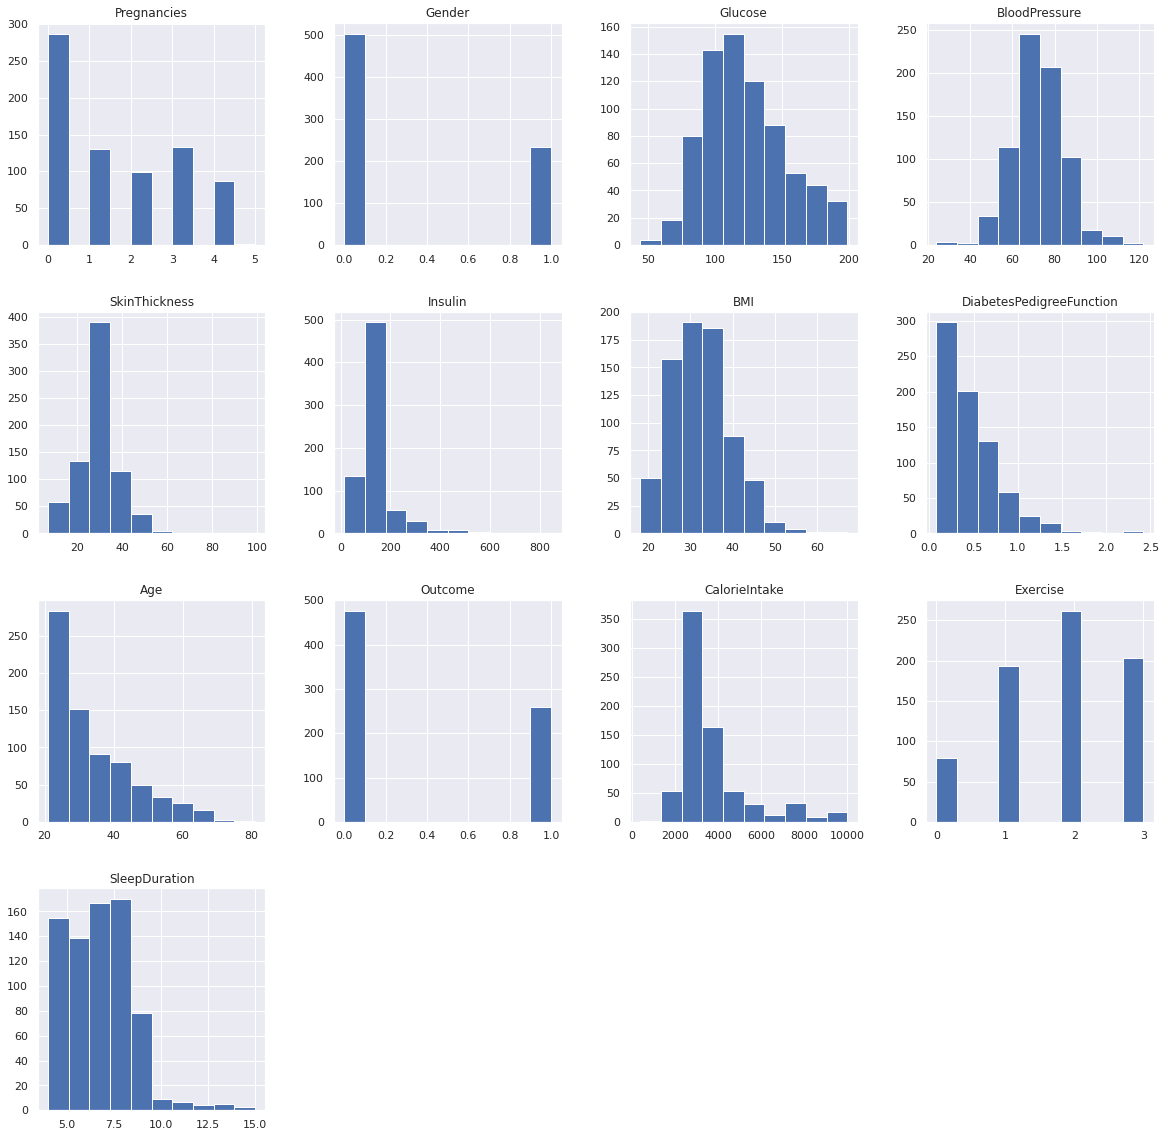

In [15]:
p = diabetes_dataset.hist(figsize = (20,20))

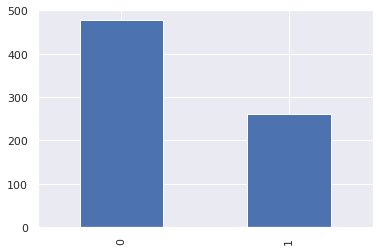

In [16]:
diabetes_dataset.Outcome.value_counts().plot(kind="bar")

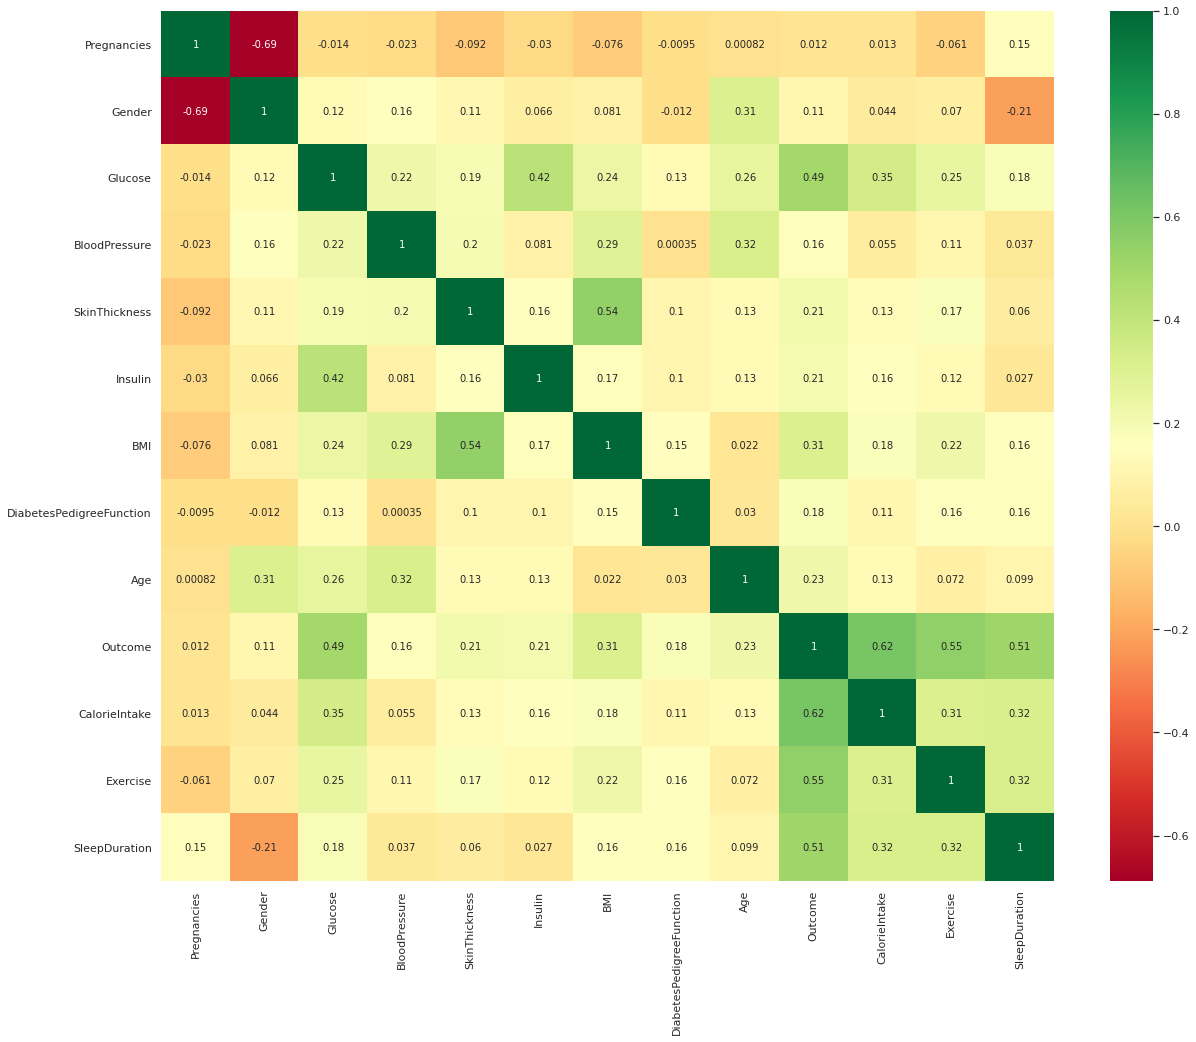

In [17]:
plt.figure(figsize=(20,16))
sns.heatmap(diabetes_dataset.corr(), annot=True,cmap ='RdYlGn')

In [18]:
diabetes_dataset.describe()

,Pregnancies,Gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,CalorieIntake,Exercise,SleepDuration
count,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000
mean,1.465400,0.317503,122.294437,72.395775,29.213052,156.210390,32.473134,0.476098,33.325645,0.352782,3654.005834,1.799186,6.957938
std,1.454644,0.465821,30.653594,12.177792,8.880039,85.409881,6.952511,0.332082,11.750222,0.478160,1706.079368,0.962814,1.668806
min,0.000000,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000,380.000000,0.000000,4.000000
25%,0.000000,0.000000,100.000000,64.000000,25.000000,120.000000,27.500000,0.245000,24.000000,0.000000,2620.000000,1.000000,6.000000
50%,1.000000,0.000000,118.000000,72.000000,29.213052,156.210390,32.300000,0.380000,29.000000,0.000000,2893.000000,2.000000,7.000000
75%,3.000000,1.000000,142.000000,80.000000,32.000000,156.210390,36.600000,0.637000,41.000000,1.000000,4100.000000,3.000000,8.000000
max,5.000000,1.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,9990.000000,3.000000,15.000000


In [20]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737 entries, 0 to 767
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               737 non-null    int64  
 1   Gender                    737 non-null    int8   
 2   Glucose                   737 non-null    float64
 3   BloodPressure             737 non-null    float64
 4   SkinThickness             737 non-null    float64
 5   Insulin                   737 non-null    float64
 6   BMI                       737 non-null    float64
 7   DiabetesPedigreeFunction  737 non-null    float64
 8   Age                       737 non-null    int64  
 9   Outcome                   737 non-null    int64  
 10  CalorieIntake             737 non-null    float64
 11  Exercise                  737 non-null    int8   
 12  SleepDuration             737 non-null    int64  
dtypes: float64(7), int64(4), int8(2)
memory usage: 70.5 KB


## Prepare dataset for training

### Create X and y

In [21]:
X = diabetes_dataset.copy(deep=True).drop(["Outcome"], axis=1)
X.head()

,Pregnancies,Gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,CalorieIntake,Exercise,SleepDuration
0,0,1,148.0,72.0,35.000000,156.21039,33.6,0.627,50,2508.3,3,6
1,1,0,85.0,66.0,29.000000,156.21039,26.6,0.351,31,2760.0,1,8
2,0,1,183.0,64.0,29.213052,156.21039,23.3,0.672,32,6480.0,2,8
4,0,1,137.0,40.0,35.000000,168.00000,43.1,2.288,33,1970.0,3,9
5,0,1,116.0,74.0,29.213052,156.21039,25.6,0.201,30,2760.0,2,4


In [22]:
y = diabetes_dataset["Outcome"]
# del diabetes_dataset
y.head()

0    1
1    0
2    1
4    1
5    0
Name: Outcome, dtype: int64

### Scale features

In [23]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled = ss.fit_transform(X)
X = pd.DataFrame(scaled, index=X.index, columns=X.columns)
X.head()

,Pregnancies,Gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,CalorieIntake,Exercise,SleepDuration
0,-1.008079,1.466142,0.839152,-0.032522,0.652123,3.329944e-16,0.162190,0.454722,1.420031,-0.671999,1.248040,-0.574416
1,-0.320158,-0.682062,-1.217468,-0.525557,-0.024009,3.329944e-16,-0.845324,-0.376963,-0.198058,-0.524368,-0.830616,0.624860
2,-1.008079,1.466142,1.981718,-0.689901,0.000000,3.329944e-16,-1.320295,0.590323,-0.112895,1.657551,0.208712,0.624860
4,-1.008079,1.466142,0.480060,-2.662040,0.652123,1.381294e-01,1.529531,5.459899,-0.027733,-0.987732,1.248040,1.224498
5,-1.008079,1.466142,-0.205480,0.131823,0.000000,3.329944e-16,-0.989254,-0.828966,-0.283220,-0.524368,0.208712,-1.773691


### Test-train split

In [24]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

# Model

In [25]:
from sklearn.neighbors import KNeighborsClassifier

# This will keep scores from different K values. 
test_scores = []

for i in range(1,20): # K -> from 1 to 20
    knn_model = KNeighborsClassifier(i)
    knn_model.fit(X_train,y_train)
    test_scores.append(knn_model.score(X_test,y_test))

In [27]:
# find best performing K. 
best_score = max(test_scores)
best_idx = test_scores.index(best_score)
print(f"Best score => K={best_idx + 1} with accuracy=%{best_score}")

Best score => K=9 with accuracy=%0.9146341463414634


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


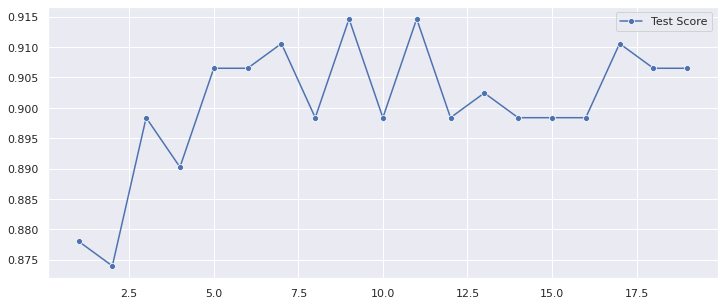

In [29]:
# plot scores. 
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,20),test_scores,marker='o',label='Test Score')

In [30]:
# Create best performing model for further results. 
best_knn = KNeighborsClassifier(9)
best_knn.fit(X_train, y_train)
best_knn.score(X_test, y_test)

0.9146341463414634

In [34]:
# create confusion matrix for best model 
from sklearn.metrics import confusion_matrix

y_pred = best_knn.predict(X_test)
confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,157,2,159
1,19,68,87
All,176,70,246


Text(0.5, 12.5, 'Predicted label')

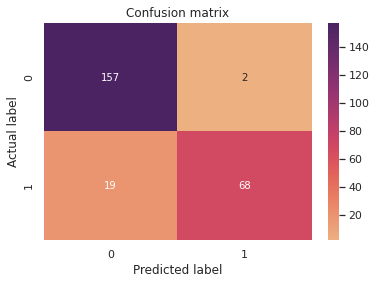

In [36]:
y_pred = best_knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="flare" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       159
           1       0.97      0.78      0.87        87

    accuracy                           0.91       246
   macro avg       0.93      0.88      0.90       246
weighted avg       0.92      0.91      0.91       246

